# Контуры: дополнительные функции

# 1 файл

In [6]:
from matplotlib import pyplot as plt
import cv2 as cv
import numpy as np

In [4]:


img = cv.imread("babochka.png")
assert img is not None, 'file not read'

imgray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

ret, thresh= cv.threshold(imgray, 127,255,0)

contour, hierarchy = cv.findContours(thresh, 1, 2)

cnt = contour[0]
cnt

array([[[192, 172]],

       [[191, 173]],

       [[191, 174]],

       ...,

       [[197, 173]],

       [[194, 173]],

       [[193, 172]]], dtype=int32)

1. Соотношение сторон
Это отношение ширины к высоте ограничивающей прямой линии объекта.

In [15]:
x, y, w, h = cv.boundingRect(cnt)
aspect_ratio = float(w) / h
print(aspect_ratio)

1.1595208070617906


2. Протяженность
Экстент - это отношение площади контура к площади ограничивающего прямоугольника.

In [16]:
area = cv.contourArea(cnt)
x,y,w,h = cv.boundingRect(cnt)
rect_area = w*h
extent = float(area)/rect_area
print(extent)

0.45397362868547314


3. Прочность
Прочность - это отношение площади контура к площади его выпуклой оболочки.

In [17]:
area = cv.contourArea(cnt)
hull = cv.convexHull(cnt)
hull_area = cv.contourArea(hull)
solidity = float(area)/hull_area
print(solidity)

0.7329789719238149


4. Эквивалентный диаметр
Эквивалентный диаметр — это диаметр окружности, площадь которой равна площади контура.

In [18]:
area = cv.contourArea(cnt)
equi_diameter = np.sqrt(4*area/np.pi)
print(equi_diameter)

1298.412919433226


5. Ориентация
Ориентация — это угол, под которым направлен объект. Следующий метод также позволяет вычислить длину большой и малой осей.

In [19]:
(x,y),(MA,ma),angle = cv.fitEllipse(cnt)
print('x: {}, y: {}, Major axis: {}, Minor axis: {}, Angle: {}'.format(x,y,MA,ma,angle))

x: 828.6754760742188, y: 998.1400146484375, Major axis: 1188.916259765625, Minor axis: 2032.5518798828125, Angle: 113.72410583496094


6. Маска и пиксельные точки
В некоторых случаях нам могут понадобиться все точки, из которых состоит объект. Это можно сделать следующим образом:

In [20]:
mask = np.zeros(imgray.shape,np.uint8)
cv.drawContours(mask,[cnt],0,255,-1)
pixelpoints = np.transpose(np.nonzero(mask))
print(pixelpoints)
cv.imshow('aa', mask)
cv.waitKey(0)
cv.destroyAllWindows()
#pixelpoints = cv.findNonZero(mask)

[[ 172  192]
 [ 172  193]
 [ 173  191]
 ...
 [1757 1206]
 [1757 1207]
 [1757 1208]]


7. Максимальное значение, Минимальное значение и их расположение

In [8]:
min_val, max_val, min_loc, max_loc = cv.minMaxLoc(imgray,mask = mask)
print("{}; {}; {}; {}".format(min_val, max_val, min_loc, max_loc))

128.0; 255.0; (616, 350); (599, 303)


8. Средний цвет или средняя интенсивность

In [21]:
mean_val = cv.mean(img,mask = mask)
print(mean_val)

(254.68826159891123, 254.68735728851573, 254.68826159891123, 0.0)


9. Крайние точки

In [23]:
print(cnt)

[[[192 172]]

 [[191 173]]

 [[191 174]]

 ...

 [[197 173]]

 [[194 173]]

 [[193 172]]]


L: (46, 1143); R: (1884, 880); T: (192, 172); B:(1193, 1757)


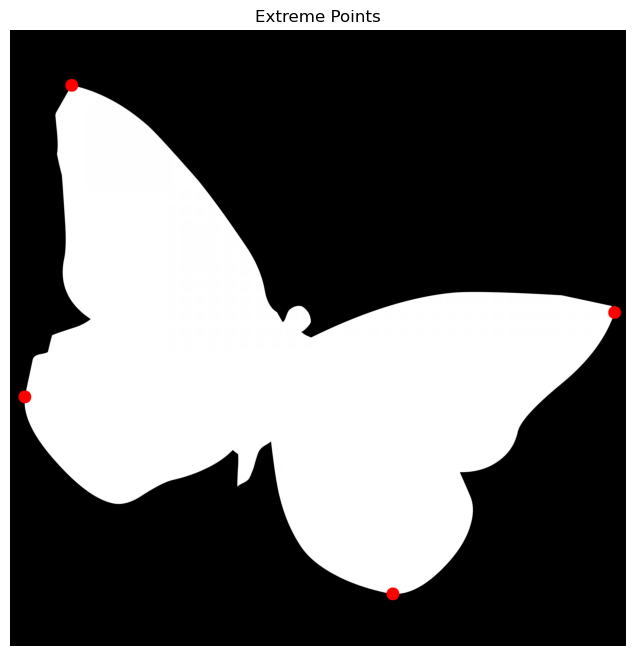

In [9]:

img = cv.imread('babochka.png')
assert img is not None, "File could not be read, check with os.path.exists()"

# Преобразование в оттенки серого и нахождение контуров
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
_, thresh = cv.threshold(gray, 127, 255, cv.THRESH_BINARY)
contours, _ = cv.findContours(thresh, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

# Предполагаем, что нас интересует самый большой контур
cnt = max(contours, key=cv.contourArea)

# Определение крайних точек
leftmost = tuple(cnt[cnt[:, :, 0].argmin()][0])
rightmost = tuple(cnt[cnt[:, :, 0].argmax()][0])
topmost = tuple(cnt[cnt[:, :, 1].argmin()][0])
bottommost = tuple(cnt[cnt[:, :, 1].argmax()][0])

print("L: {}; R: {}; T: {}; B:{}".format(leftmost, rightmost, topmost, bottommost))

# Рисование крайних точек
marked_img = img.copy()
cv.circle(marked_img, leftmost, 20, (0, 0, 255), -1)    # Красная точка
cv.circle(marked_img, rightmost, 20, (0, 0, 255), -1)  # Красная точка
cv.circle(marked_img, topmost, 20, (0, 0, 255), -1)    # Красная точка
cv.circle(marked_img, bottommost, 20, (0, 0, 255), -1) # Красная точка

# Преобразование изображения для matplotlib (BGR -> RGB)
marked_img_rgb = cv.cvtColor(marked_img, cv.COLOR_BGR2RGB)

# Вывод изображения с помощью matplotlib
plt.figure(figsize=(8, 8))
plt.imshow(marked_img_rgb)
plt.title("Extreme Points")
plt.axis('off')
plt.show()

# Контуры : больше функций

# 2 файл

1. Дефекты выпуклости
Во второй главе, посвящённой контурам, мы рассмотрели, что такое выпуклая оболочка. Любое отклонение объекта от этой оболочки можно считать дефектом выпуклости.

В OpenCV есть готовая функция для поиска таких дефектов cv.convexityDefects(). Базовый вызов функции выглядит следующим образом:

In [21]:
hull = cv.convexHull(cnt,returnPoints = False)
defects = cv.convexityDefects(cnt,hull)

Примечание
Помните, что при поиске выпуклой оболочки необходимо передать параметр returnPoints = False, чтобы найти дефекты выпуклости.
Он возвращает массив, в каждой строке которого содержатся следующие значения: [ начальная точка, конечная точка, самая удалённая точка, приблизительное расстояние до самой удалённой точки ]. Мы можем визуализировать это с помощью изображения. Мы рисуем линию, соединяющую начальную и конечную точки, а затем рисуем круг в самой удалённой точке. Помните, что первые три возвращаемых значения являются индексами cnt. Поэтому нам нужно извлечь эти значения из cnt.

In [18]:
import cv2 as cv
import numpy as np
img = cv.imread('babochka.png')
img = cv.resize(img, (500, 700))
assert img is not None, "file could not be read, check with os.path.exists()"
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

ret,thresh = cv.threshold(img_gray, 127, 255,0)
contours,hierarchy = cv.findContours(thresh,2,1)
cnt = contours[0]
hull = cv.convexHull(cnt,returnPoints = False)
defects = cv.convexityDefects(cnt,hull)
for i in range(defects.shape[0]):
   s,e,f,d = defects[i,0]
   start = tuple(cnt[s][0])
   end = tuple(cnt[e][0])
   far = tuple(cnt[f][0])
   cv.line(img,start,end,[0,255,0],2)
   cv.circle(img,far,5,[0,0,255],-1)
cv.imshow('img',img)
cv.waitKey(0)
cv.destroyAllWindows()

2. Тест точечного полигона
Эта функция находит кратчайшее расстояние между точкой на изображении и контуром. Она возвращает расстояние, которое является отрицательным, если точка находится за пределами контура, положительным, если точка находится внутри контура, и равным нулю, если точка находится на контуре.

Например, мы можем проверить точку (50,50) следующим образом:

In [25]:
dist = cv.pointPolygonTest(cnt,(50,50),True)

3. Подбирайте формы
В OpenCV есть функция cv.matchShapes(), которая позволяет сравнивать две фигуры или два контура и возвращает показатель сходства. Чем ниже результат, тем лучше совпадение. Он рассчитывается на основе значений ху-момента. Различные методы измерения описаны в документации.

In [14]:
import cv2 as cv
import numpy as np
img1 = cv.imread('babochka.png', cv.IMREAD_GRAYSCALE)
img1 = cv.resize(img1, (500, 700))

rows,cols = img1.shape
 
# cols-1 and rows-1 are the coordinate limits.
M = cv.getRotationMatrix2D(((cols-1)/2.0,(rows-1)/2.0),90,1) #cv.getRotationMatrix2D(center, angle, scale)
img2 = cv.warpAffine(img1,M,(cols,rows))

assert img1 is not None, "file could not be read, check with os.path.exists()"
assert img2 is not None, "file could not be read, check with os.path.exists()"
ret, thresh = cv.threshold(img1, 127, 255,0)
ret, thresh2 = cv.threshold(img2, 127, 255,0)
contours,hierarchy = cv.findContours(thresh,2,1)
cnt1 = contours[0]
contours,hierarchy = cv.findContours(thresh2,2,1)
cnt2 = contours[0]
ret = cv.matchShapes(cnt1,cnt2,1,0.0)
print( ret )

0.058570914192677404


# Соответствие шаблону

# 3 файл

Cопоставление шаблонов — это метод поиска и определения местоположения шаблона на изображении большего размера. В OpenCV для этого есть функция cv.matchTemplate(). Она просто накладывает шаблон на входное изображение (как при двумерной свёртке) и сравнивает шаблон и фрагмент входного изображения под шаблоном. В OpenCV реализовано несколько методов сравнения. (Подробнее можно посмотреть в документации.) Функция возвращает изображение в оттенках серого, где каждый пиксель показывает, насколько окрестности этого пикселя совпадают с шаблоном.

Если входное изображение имеет размер (WxH), а изображение-шаблон имеет размер (wxh), то выходное изображение будет иметь размер (W-w+1, H-h+1). Получив результат, вы можете использовать функцию cv.minMaxLoc() для поиска максимального/минимального значения. Примите его за верхний левый угол прямоугольника и примите (w, h) за ширину и высоту прямоугольника. Этот прямоугольник — ваша область шаблона.

Соответствие шаблону в OpenCV
Здесь, в качестве примера, мы будем искать лицо Месси на его фотографии. Поэтому я создал шаблон, как показано ниже:
messi_face.jpg
изображение
Мы попробуем все методы сравнения, чтобы увидеть, как выглядят их результаты:

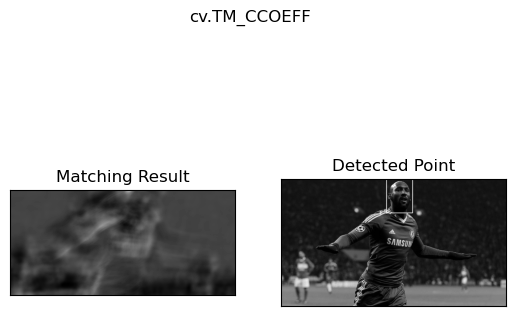

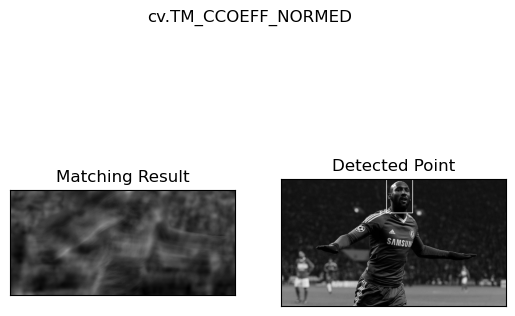

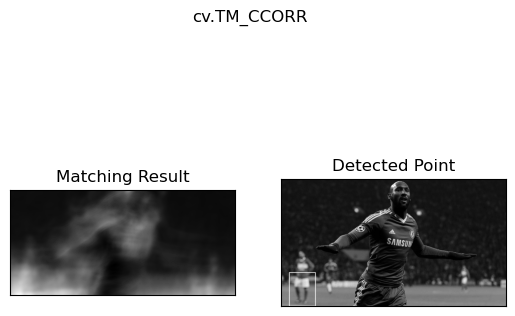

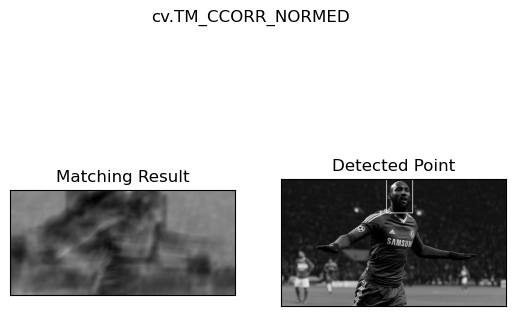

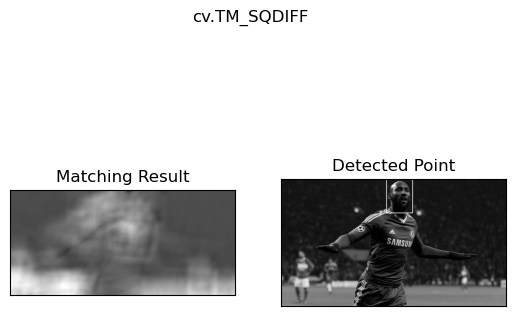

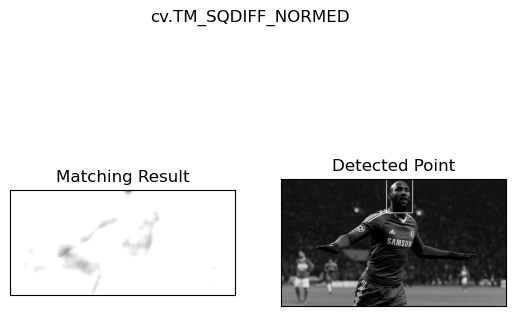

In [19]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = cv.imread('football.jpg',0)
img2 = img.copy()
template = cv.imread('f_template.png',0)
w, h = template.shape[::-1]
# All the 6 methods for comparison in a list
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']
for meth in methods:
    img = img2.copy()
    method = eval(meth)
    # Apply template Matching
    res = cv.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv.rectangle(img,top_left, bottom_right, 255, 2)
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    plt.show()

Вы можете видеть, что результат использования cv.TM_CCORR не так хорош, как мы ожидали.

Сопоставление шаблонов с несколькими объектами
В предыдущем разделе мы искали изображение лица Месси, которое встречается на изображении только один раз. Предположим, вы ищете объект, который имеет несколько вхождений, cv.minMaxLoc() не выдаст вам все местоположения. В этом случае мы будем использовать пороговое значение. Итак, в этом примере мы будем использовать скриншот знаменитой игры Марио и найдем в нем монеты.

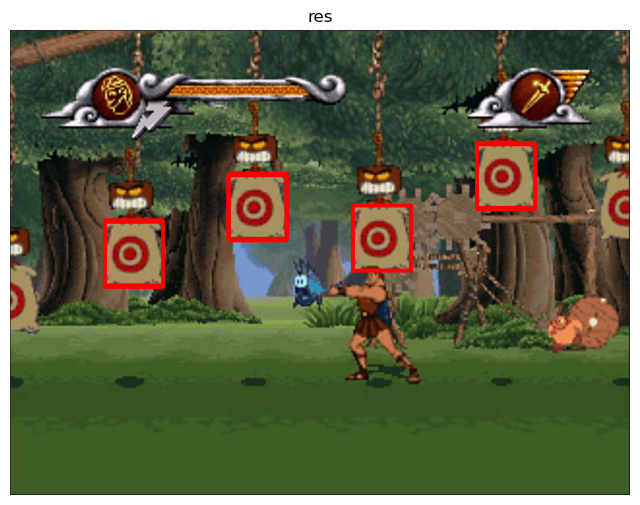

In [23]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img_rgb = cv.imread('herc.png')
#assert img_rgb  isnot None, "file could not be read, check with os.path.exists()"
img_gray = cv.cvtColor(img_rgb, cv.COLOR_BGR2GRAY)
template = cv.imread('h_template.png', cv.IMREAD_GRAYSCALE)
assert template is not None, "file could not be read, check with os.path.exists()"
w, h = template.shape[::-1]
res = cv.matchTemplate(img_gray,template,cv.TM_CCOEFF_NORMED)
threshold = 0.8
loc = np.where( res >= threshold)
for pt in zip(*loc[::-1]):
    cv.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)


img_rgb = cv.cvtColor(img_rgb, cv.COLOR_BGR2RGB)
# Вывод изображения с помощью matplotlib
plt.figure(figsize=(8, 8))
plt.imshow(img_rgb)
plt.title("res")
plt.axis('off')
plt.show()
